In [41]:
%run ../talktools.py

# Structuring Code for Release

<center><h2>Modules and Packages</h2></center>

* As code gets more involved, it becomes unwieldy & unnatural to keep everything in the same file, or even the same folder

* Functions from other codes made for different reasons might be useful elsewhere

* Useful to break up code into modules and packages  - used like ‘package.module’

* **Module**: file containing defined functions & variables. **It must have a .py extension.**

* **Package**: a properly-organized folder containing modules (packages Numpy are well-developed examples - you can make your own) 

In [ ]:
!conda -e

In [ ]:
%ls ~/ay250/lib/python3.9/site-packages/

In [ ]:
!pip install twilio

In [ ]:
from twilio import jwt

In [ ]:
%ls ~/ay250/lib/python3.9/site-packages/twilio/jwt/

<p><h2>Modules: Setting up your path</h2></p>

`PYTHONPATH`
Augment the default search path for module files. The format is the same as the shell’s PATH: one or more directory pathnames separated by os.pathsep (e.g. colons on Unix or semicolons on Windows). Non-existent directories are silently ignored.

In addition to normal directories, individual PYTHONPATH entries may refer to zipfiles containing pure Python modules (in either source or compiled form). Extension modules cannot be imported from zipfiles.
The default search path is installation dependent, but generally begins with prefix/lib/pythonversion (see PYTHONHOME above). It is always appended to PYTHONPATH.

An additional directory will be inserted in the search path in front of PYTHONPATH as described above under Interface options. The search path can be manipulated from within a Python program as the variable `sys.path`.

Add to your .bashrc, .cshrc, or .tcshrc file:
```bash
#BASH Style: 
export PYTHONPATH=/path/to/your/code:$PYTHONPATH
#CSH Style: 
setenv PYTHONPATH /path/to/your/code
```

In [ ]:
import sys
# Get a list of all paths python is looking at with sys.path
print(sys.path[-4:])  # only look at the first 4 to save space
# Can append to this list:
# sys.path.append(“/new/software/path/”)

New paths appended will not be preserved upon exiting python. 
For long-term path appending, use PYTHONPATH environment variable defined in previous slide.

<p><h2> Packages</h2></p>

"Packages are a way of structuring Python’s module namespace by using “dotted module names”. For example, the module name A.B designates a submodule named B in a package named A. Just like the use of modules saves the authors of different modules from having to worry about each other’s global variable names, the use of dotted module names saves the authors of multi-module packages like NumPy or the Python Imaging Library from having to worry about each other’s module names." [Python tutorial](https://docs.python.org/3/tutorial/modules.html)

* If path is set correctly, code can be broken up into reasonable folders and imported as necessary, either by importing entire modules (.py files) or functions/classes within the modules.

* Put an `__init__.py` file in each folder you want to be able to import from.

* Code in `__init__.py` is run when the package, or any derivative of it, is imported.  Often `__init__`.py is an empty file.

* if a package’s `__init__.py` code defines a list named `__all__`, it is taken to be the list of module names that should be imported when from package import * is encountered

Example:
```pre
setup.py
README.md
LICENSE.txt
sound/                      #Top-level package
  __init__.py               #Initialize the sound package
  formats/                  #Subpackage for file format conversions
      __init__.py
      wavread.py
      wavwrite.py
      aiffread.py
      aiffwrite.py
      auread.py
      auwrite.py
      ...
  effects/                  #Subpackage for sound effects
      __init__.py
      echo.py
      surround.py
      reverse.py
      ...
  filters/                  #Subpackage for filters
      __init__.py
      equalizer.py
      vocoder.py
      karaoke.py
      ...
```

# Distributions - setuptools #

https://packaging.python.org/en/latest/guides/distributing-packages-using-setuptools/


* `setuptools`: the standard way to take your directories of code and bundle them up for easy installation and use by others
* You create a setup.py file which allows others to install your code in the standard fashion.
* There are myriad options for the metadata you can define, an incredibly simple example is below:
```python
from setuptools import setup
setup(name='My_Package',
      version='0.04',
       license='License_to_not_kill',
      py_modules=['my_package_name'],
      )
```

https://github.com/pypa/sampleproject/blob/main/setup.py

Running:
```bash
pip install -e .
```
will install your package (and modules) into the Python path.

If you’ve written your own package, use setuptools to create a standard, share-able zipped file
```bash
cd My_Package_folder
pip install build
```

```bash
* Creating venv isolated environment...
* Installing packages in isolated environment... (setuptools >= 40.8.0, wheel)
* Getting dependencies for sdist...
* Installing packages in isolated environment... (pytest-runner)
* Building sdist...
running sdist
running egg_info
writing PyAdder.egg-info/PKG-INFO
writing dependency_links to PyAdder.egg-info/dependency_links.txt
writing top-level names to PyAdder.egg-info/top_level.txt
reading manifest file 'PyAdder.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE.txt'
running check
copying files to PyAdder-0.0.4...
Writing PyAdder-0.0.4/setup.cfg
Successfully built PyAdder-0.0.4.tar.gz
```
http://guide.python-distribute.org/

## Putting it all together

See package management: https://packaging.python.org/

```bash
# tree PyAdder/ -a -T PyAdder -C --noreport -I ".git|*.pyc"
PyAdder/
├── .gitignore           # files/paths to ignore if you are git
├── .github              # CI
│   └── workflows
│       └── test.yml
├── CHANGES.txt
├── LICENSE.txt          # Be nice. Set a license.
├── MANIFEST.in
├── README.md            # should always have a readme
├── adder                # name of your package
│   ├── __init__.py
│   └── tests                    # put your test in separate directories 
│       ├── __init__.py
│       └── test_one_number.py
├── requirements.txt             # python requirements
├── setup.cfg
└── setup.py
```

Let's look at the repo: https://github.com/profjsb/PyAdder

In [ ]:
cd PyAdder/

In [ ]:
!python setup.py test

In [ ]:
!python setup.py sdist bdist_wheel

In [ ]:
ls dist/

In [ ]:
!pip install --force-reinstall dist/PyAdder-0.0.4-py3-none-any.whl

In [ ]:
import adder
adder.run(1,2,10,-1)

In [ ]:
adder.__version__

## PyPi

Let's upload to PyPi (see https://packaging.python.org/en/latest/tutorials/packaging-projects/#uploading-the-distribution-archives)

In [ ]:
#!pip install twine

In [ ]:
!twine check dist/*

In [ ]:
!twine upload dist/*

Now you should be able to pip install this:

In [ ]:
!pip install -U pyadder

# Continuous Integration

"Continuous Integration is a software development practice where members of a team integrate their work frequently, usually each person integrates at least daily - leading to multiple integrations per day. Each integration is verified by an automated build (including test) to detect integration errors as quickly as possible. Many teams find that this approach leads to significantly reduced integration problems and allows a team to develop cohesive software more rapidly."

http://docs.python-guide.org/en/latest/scenarios/ci/

**Github Actions**: https://github.com/features/actions


In [ ]:
!cat .github/workflows/test.yml

Let's look at: https://github.com/profjsb/PyAdder/actions

# Making Code Citeable

http://ivory.idyll.org/blog/2016-using-zenodo-to-archive-github.html

https://guides.github.com/activities/citable-code/

<img src="https://www.evernote.com/l/AUVFhdB6uhFC7IAz3uSz5K-L74xYniPLyQUB/image.png">


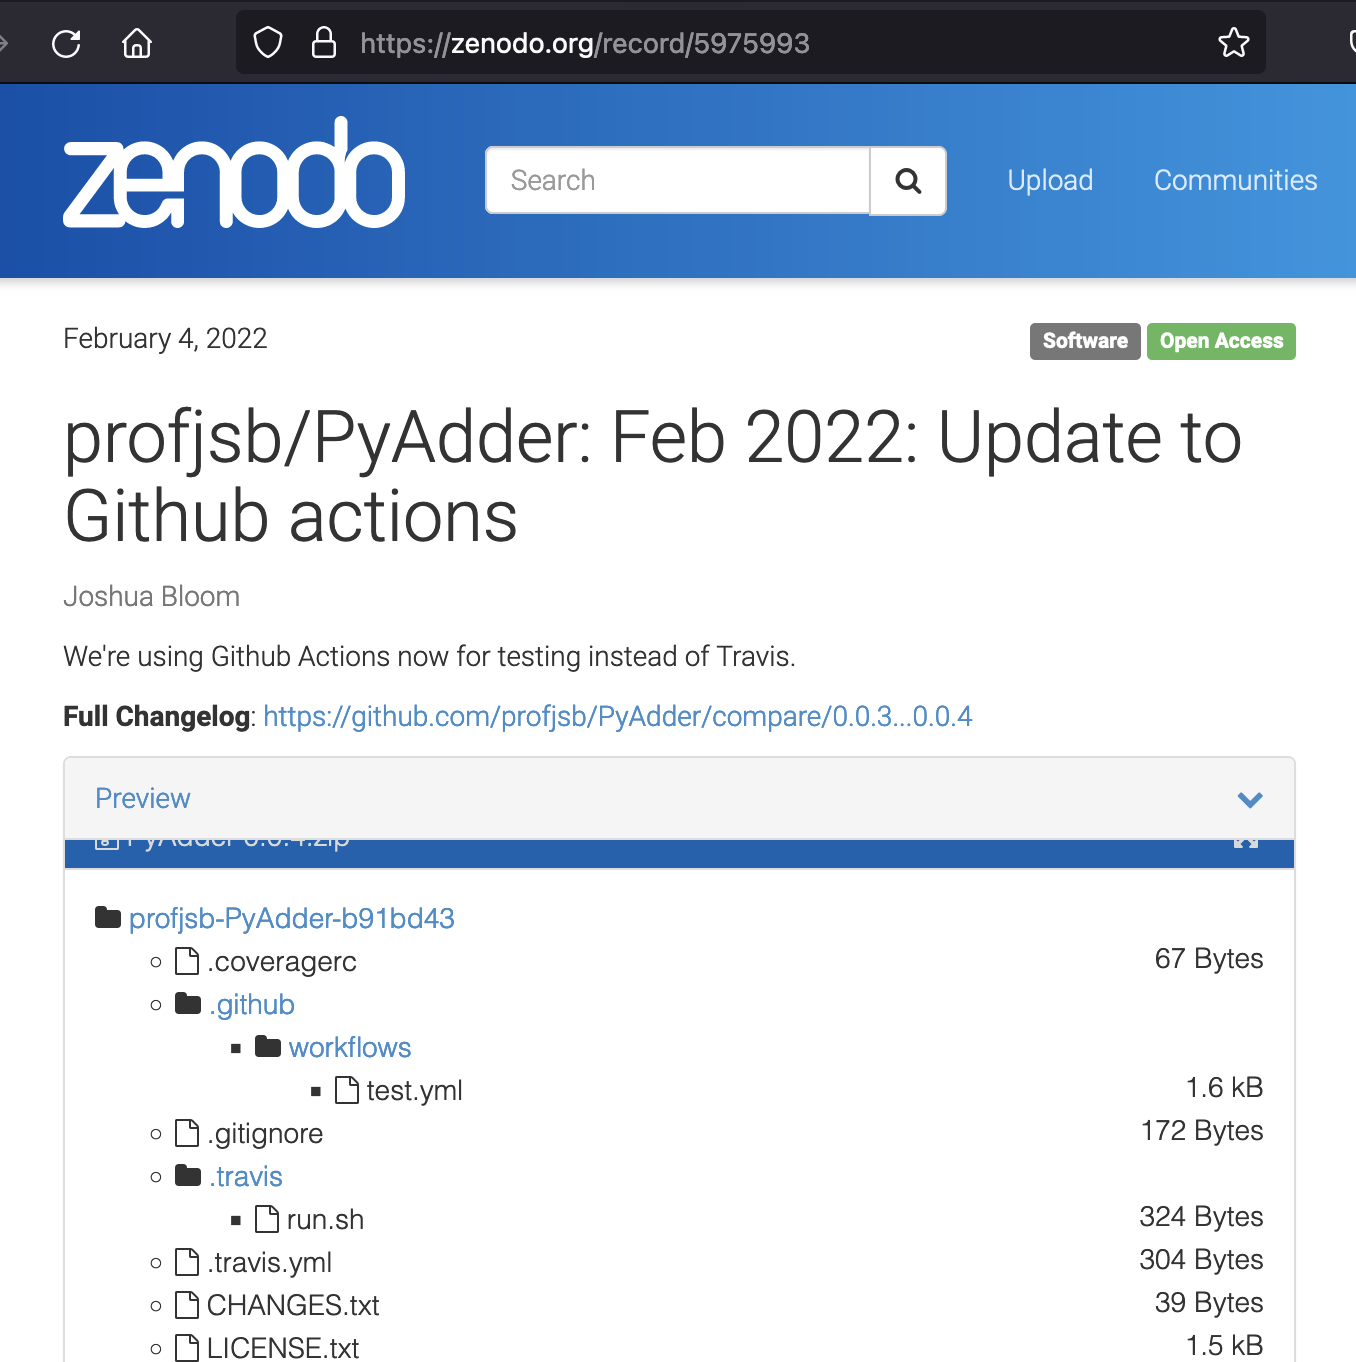

https://doi.org/10.5281/zenodo.5975993
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5975993.svg)](https://doi.org/10.5281/zenodo.5975993)


## Documentation

GHA (and other CI systems) can also help you build and deploy documentation. Eg. https://docs.readthedocs.io/en/stable/tutorial/index.html

cf. https://github.com/skyportal/skyportal/blob/ab6e2a5f53c31c5dc73ab9ca835d13c4171e3261/.github/workflows/build-and-deploy-docs.yaml#L74

In [ ]:
%load_ext watermark

In [42]:
%watermark --iversions

twilio  : 7.5.1
numpy   : 1.20.3
adder   : 0.0.4
sys     : 3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:38:53) 
[Clang 11.1.0 ]
autopep8: 1.6.0
json    : 2.0.9

